In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

ModuleNotFoundError: No module named 'otter'

https://github.com/Aoverbye/eds220-hwk2# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/Aoverbye/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<AxesSubplot:title={'center':'Average Commercial Salmon Catch By Region From 1978 To 1997'}, xlabel='Site', ylabel='Average Commercial Catch (k)'>

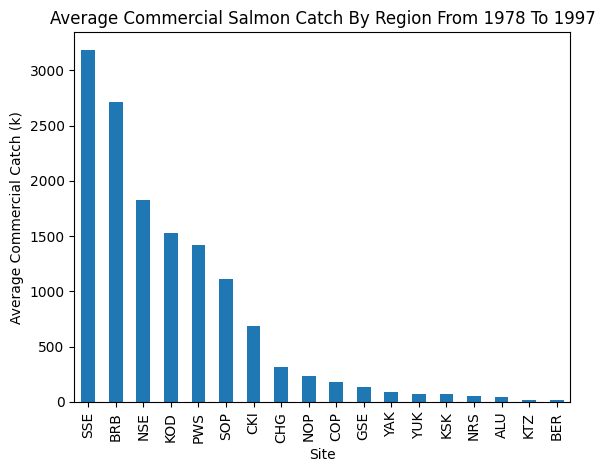

In [6]:
# FINAL CODE
# Import pandas as pd
import pandas as pd

# Import numpy as np
import numpy as np

# Read in salmon_data.csv
catch_data = pd.read_csv('data/salmon_data.csv')


# Update dataframe so it no longer includes 'notesRegCode'
catch_data = catch_data.drop(columns=['notesRegCode'])


# Update value of 'I' to value of '1'
catch_data.loc[catch_data['Catch'] == 'I', 'Catch'] = 1


# Update 'Catch' column to int64 data type
catch_data['Catch'] = pd.to_numeric(catch_data['Catch'])


# Create data frame with the average salmon catch per region and sort in descending order in order to plot in descending order
avg_region = (catch_data.groupby('Region')['Catch'].mean().rename('Catch').sort_values(ascending=False))

# Create plot of Average Salmon catch by site
avg_region.plot(kind='bar', title='Average Commercial Salmon Catch By Region From 1978 To 1997',
                xlabel=('Site'),
                ylabel=('Average Commercial Catch (K)'))


## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [6]:
# a.
# Read in salmon_data.csv
catch_data = pd.read_csv('data/salmon_data.csv')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [3]:
# b. 
# Do premilimary data exploration by viewing .info(), .columns(), .head(), and the sum of nulls in data
# View general catch_data info
catch_data.info

# View column names
catch_data.columns

# View top five rows of data
catch_data.head()

# Print number of NAs in data
print(catch_data.isnull().sum())

Region     0
Year       0
Species    0
Catch      0
dtype: int64


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I used the `.columns` to be able to see the column names as that will be import for calling in information in the future.
I did `.info` so I could get a general lay of the land of the data file. 
I did `.head()` so I could read exactly how the data is imputted info the fataframe.
I did `catch_data.isnull().sum` so I could see how many Nans I may be dealing with. 

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [ ]:
# Store unique values of notesRegCode in notes_unique varaible
notes_unique = catch_data['notesRegCode'].unique()

# Print notes_unique to view changes 
print(notes_unique)

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [ ]:
# Drop the notesRegCode column
catch_data = catch_data.drop(columns=['notesRegCode'])

In [ ]:
# Check column names to ensure drop worked
catch_data.columns

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


_Region and Species are objects, which is what I would expect because they are categorical data. I would expect Catch to be an int64 because it is the number of fish that were caught and I would expect the researchers to count whole fish without decimals. The Year column is also an int64, which is not surprising because the data goes back to the 1800s, and would probably not be specific enough to warrent a datetime data approach. _

In [ ]:
# Use dtype to check data types by column
catch_data.dtypes

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [8]:
# Run .astype('int64') to view error when attempting to change column data type
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [9]:
# Find rows with value 'I' 
catch_I = catch_data[catch_data['Catch'] == 'I'][['Region', 'Year', 'Species', 'Catch']]

# View rows 
catch_I 

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [12]:
# Update value of 'I' to value of '1'
catch_data.loc[catch_data['Catch'] == 'I', 'Catch'] = 1

# Save the changed row (.loc[400]) as catch_1
catch_1 = catch_data.loc[400]

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [16]:
# Update 'Catch' column to int64 data type
catch_data['Catch'] = pd.to_numeric(catch_data['Catch'])

# Save the new catch_data data type as catch_column_type
catch_column_type = catch_data['Catch'].dtypes

# View column type
catch_column_type

dtype('int64')

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [ ]:
# Create data frame with the average salmon catch per region, ensure the column keeps its name with .rename() function
# and put in descending order.
avg_region = (catch_data.groupby('Region')['Catch'].mean().rename('Catch').sort_values(ascending=False))


<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<AxesSubplot:title={'center':'Average Commercial Salmon Catch By Region From 1978 To 1997'}, xlabel='Site', ylabel='Average Commercial Catch (K)'>

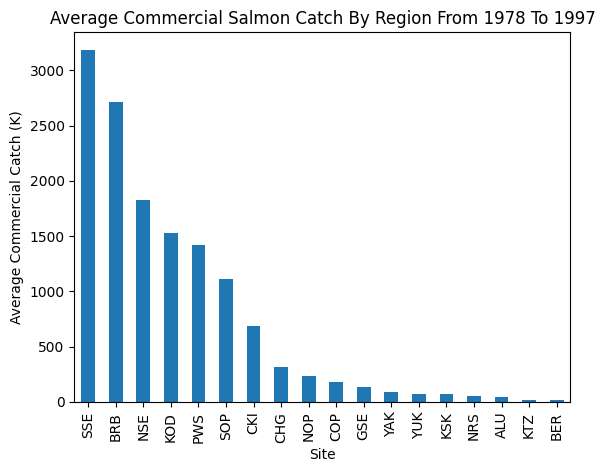

In [7]:
# Create plot of Average Salmon catch by site
avg_region.plot(kind='bar', 
                title='Average Commercial Salmon Catch By Region From 1978 To 1997',
                xlabel=('Site'),
                ylabel=('Average Commercial Catch (K)'))

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

Southern Southeast Alaska (SSE) and Bristol Bay Management Area (BRB) had the most commercial catches by a good margin. Kotzebue Management Area (KTZ) and Bering River Subarea Copper River Subarea (BER) had the least.

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).